In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import os
from matplotlib import rc
from matplotlib.gridspec import GridSpec

%matplotlib inline

In [5]:
os.getcwd()

'/volume1/home/tdeng/SingleCell/scGeneClust/figures/biological_analysis/DEG'

In [6]:
# prepare DEGs
celltype_deg = pd.read_excel("Supplementary Table 1.xlsx", sheet_name=None, usecols=[2, 7], converters={0:np.float_, 1:np.str_})
unique_deg = np.unique(np.concatenate(list(celltype_deg.values()))[:,1])
celltypes = list(celltype_deg.keys())
data = pd.DataFrame(np.zeros(shape=(unique_deg.shape[0], len(celltypes))), index=unique_deg, columns=celltypes)
for k, v in celltype_deg.items():
    data.loc[v['featureData.symbol'], k] = v['log2FoldChange'].values
data.rename(columns={'cd8':'Tc', 'cd4':'Th', 'cd19':'B', 'megakaryocyte': 'Mkc', 'cd14':'cMono', 'cd16 mono': 'ncMono', 'nk':'NK', 'dc': 'DC'}, inplace=True)
data = data[['NK', 'Tc', 'Th', 'B', 'DC', 'ncMono', 'cMono', 'Mkc']]
data_sample = data.tail(10)
data_sample

,NK,Tc,Th,B,DC,ncMono,cMono,Mkc
ZNF846,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.104093,0.0
ZNF92,0.000000,0.00000,0.000000,1.434870,0.000000,0.000000,0.000000,0.0
ZNFX1,2.486225,1.85053,1.519379,2.631798,2.045176,2.053735,2.362874,0.0
ZNHIT1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.197668,0.0
ZNRF2,0.000000,0.00000,0.000000,0.000000,0.000000,1.947201,1.754476,0.0
ZRSR2,1.325071,0.00000,0.000000,0.000000,0.000000,0.000000,1.333089,0.0
ZSCAN16,0.000000,0.00000,0.000000,0.000000,0.000000,1.724700,0.000000,0.0
ZSWIM7,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.169352,0.0
ZW10,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.769858,0.0
ZZEF1,0.000000,0.00000,0.000000,-1.698223,0.000000,0.000000,0.000000,0.0


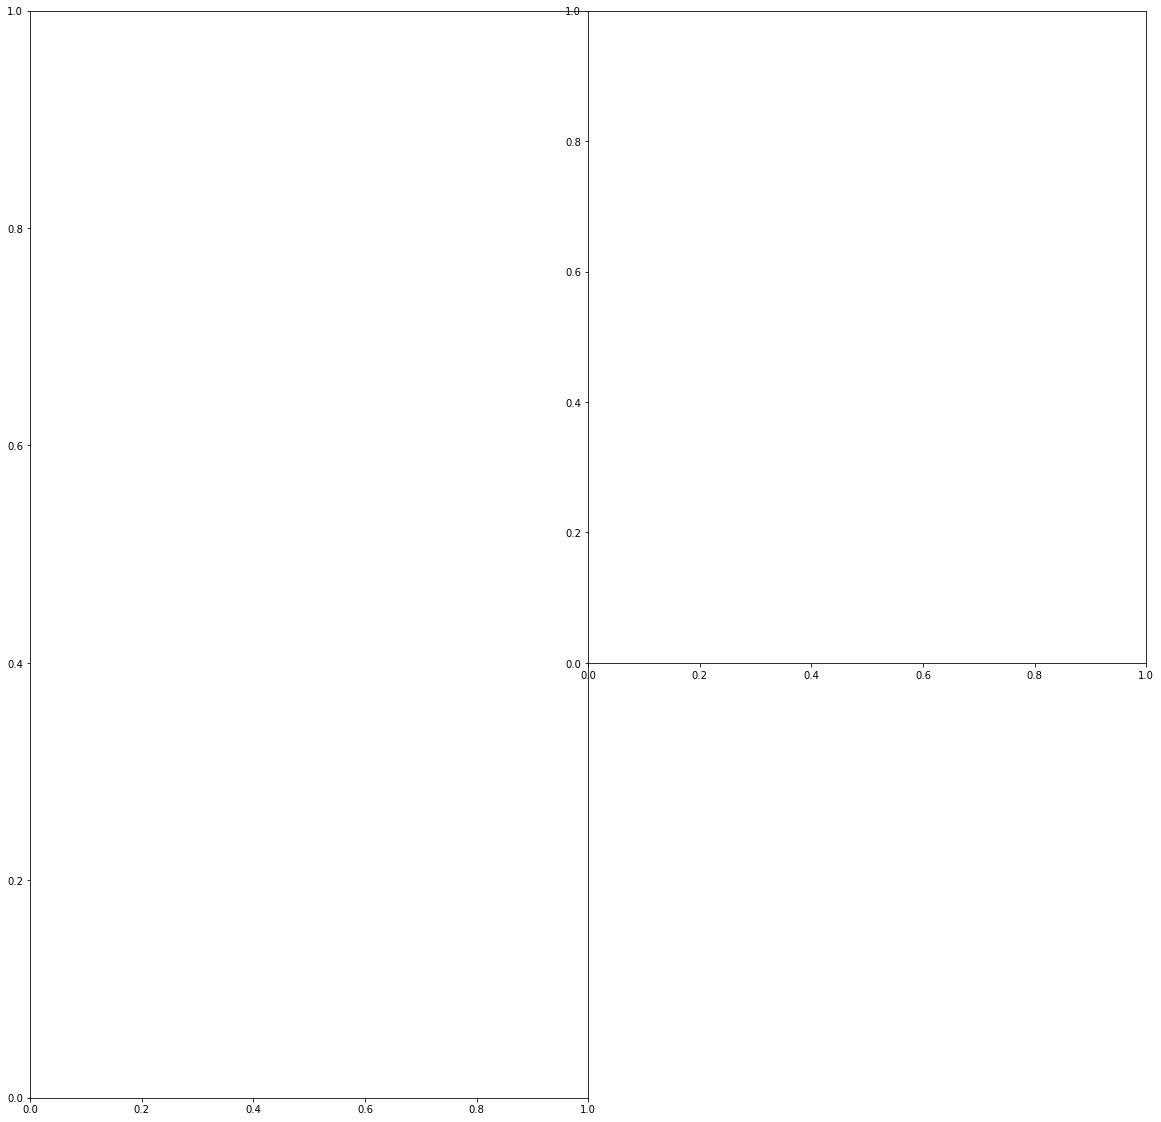

In [46]:
# create figure
fig = plt.figure(figsize=(20, 20))
gs = GridSpec(20, 20)
gs.update(wspace=0., hspace=0.)
ax1 = fig.add_subplot(gs[:,:10])
ax2 = fig.add_subplot(gs[:12,10:])

In [45]:
# prepare data for -fast and -ps
rename_cluster = {'Cluster I':'I. Myeloid up','Cluster II':'II. Mono down','Cluster III':'III. Pan up','Cluster IV':'IV. NK/Tc down','Cluster V':'V. DC down', 'Cluster VI':'VI. Lymphoid down', 'Cluster VII':'VII. B down',}
method = 'ps'

exper = pd.read_excel(f"only_stim_{method}.xlsx", sheet_name=None, usecols=[0], converters={0:np.str_})
exper = {rename_cluster[k]: v.values.squeeze(axis=1) for k, v in exper.items()}  # {cluster:genes}
exper_all_genes = data.loc[np.hstack(list(exper.values())), :]  # genes fold change, dataframe


# ps 'FCGR3B', 'ISG15', 'CXCL10', 'CCL2'
# fast 'CCL3', 'CFLAR', 'SSB', 'CCL5', 'CCL4', 'IL1B', 'RSAD2'
exper_ori_genes = ['FCGR3B', 'ISG15', 'CXCL10', 'CCL2'] # genes in the most sig pathways
# ps 'RIPK2', 'NADK', 'SLFN12', 'SLFN5', 'APOBEC3H', 'DYNLT1', 'IDO1', 'CXCL11', 'IFITM2', 'CCL7', 'IFITM3', 'CCL8'
# fast 'APOBEC3G', 'CASP4', 'RABGAP1L', 'GZMB', 'DYNLT1', 'IDO1', 'CXCL11', 'SAT1', 'PRF1', 'IL1RN', 'CCL7', 'APOBEC3B', 'TYMP', 'CST7'
exper_rel_genes = ['RIPK2', 'NADK', 'SLFN12', 'SLFN5', 'APOBEC3H', 'DYNLT1', 'IDO1', 'CXCL11', 'IFITM2', 'CCL7', 'IFITM3', 'CCL8']  # IFN-beta related genes


ctrl = pd.read_excel(f"random_{method}.xlsx", sheet_name=None, usecols=[0], converters={0:np.str_})
ctrl = {rename_cluster[k]: v.values.squeeze(axis=1) for k, v in ctrl.items()}  # {cluster:genes}
ctrl_all_genes = data.loc[np.hstack(list(ctrl.values())), :]  # genes fold change, dataframe
ctrl_ori_genes = ['CXCL2']
ctrl_rel_genes = ['SAMD4A']

vmax = max(exper_all_genes.values.max(), ctrl_all_genes.values.max())
vmin = min(exper_all_genes.values.min(), ctrl_all_genes.values.min())


In [47]:
sns.heatmap(exper_all_genes, square=True, linewidth=4, cmap='RdBu_r', center=0, vmin=vmin, vmax=vmax, ax=ax1,
            cbar=False)
ax1.set_title(f"GeneClust-{method}", weight='bold', size=18)
ax1.yaxis.tick_right()
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize='x-large')
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize='large')

# plot lines
xlim_min, xlim_max = ax1.get_xlim()
ax1.set_xlim(xlim_min - 0.5, xlim_max)
ymin, ymax = [], []
for i, genes in enumerate(exper.values()):
    if len(ymin) == 0:
        ymin.append(0 + 0.1)
        ymax.append(len(genes) - 0.1)
    else:
        ymin.append(round(ymax[-1]) + 0.1)
        ymax.append(round(ymax[-1]) + len(genes) - 0.1)
ax1.vlines(x=[-0.2] * len(exper), ymin=ymin, ymax=ymax,linewidth=4,color='black')

# add cluster id
for i, c in enumerate(exper.keys()):
    yc = (ymin[i] + ymax[i]) / 2
    ax1.text(-6.5, yc, c, fontsize='xx-large', va='center')

# add colors
for label in ax1.get_yticklabels():
    if label.get_text() in exper_ori_genes:
        label.set_color("#BB83F4")  # purple
    elif label.get_text() in exper_rel_genes:
        label.set_color("#50B131")  # green
    else:
        label.set_color("#B3B3B3")

In [48]:
sns.heatmap(ctrl_all_genes, square=True, linewidth=4, cmap='RdBu_r', center=0, vmin=vmin, vmax=vmax, ax=ax2,
            cbar_kws={'location':'bottom', 'orientation':'horizontal', 'shrink': 0.6, 'pad':0.05, 'fraction':0.1,'aspect':15, 'label':'log2 FC'})
ax2.set_title("Random Selection",weight='bold', size=18)
ax2.yaxis.tick_right()
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, fontsize='x-large')
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize='large')

# plot lines
xlim_min, xlim_max = ax1.get_xlim()
ax2.set_xlim(xlim_min - 0.5, xlim_max)
ymin, ymax = [], []
for i, genes in enumerate(ctrl.values()):
    if len(ymin) == 0:
        ymin.append(0 + 0.1)
        ymax.append(len(genes) - 0.1)
    else:
        ymin.append(round(ymax[-1]) + 0.1)
        ymax.append(round(ymax[-1]) + len(genes) - 0.1)
ax2.vlines(x=[-0.2] * len(ctrl), ymin=ymin, ymax=ymax,linewidth=4,color='black')

# add cluster id
for i, c in enumerate(ctrl.keys()):
    yc = (ymin[i] + ymax[i]) / 2
    ax2.text(-6.5, yc, c, fontsize='xx-large', va='center')

# add colors
for label in ax2.get_yticklabels():
    if label.get_text() in ctrl_ori_genes:
        label.set_color("#BB83F4")
    elif label.get_text() in ctrl_rel_genes:
        label.set_color("#50B131")
    else:
        label.set_color("#B3B3B3")

In [49]:
fig.savefig(f'DEG_heatmap_{method}.png', dpi=300, bbox_inches='tight')